In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from typing import Tuple
import json

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

def load_df(p: Path) -> pd.DataFrame:
    data = pd.read_csv(p)
    times = data["IterTime"]
    t_sum = 0.0
    for i in range(0, len(times)):
        t_sum += times[i]
        times[i] = t_sum
    data["Bandwidth"] /= 1000.0
    return data

Text(0.5, 1.0, 'Baseline for buddy kernel')

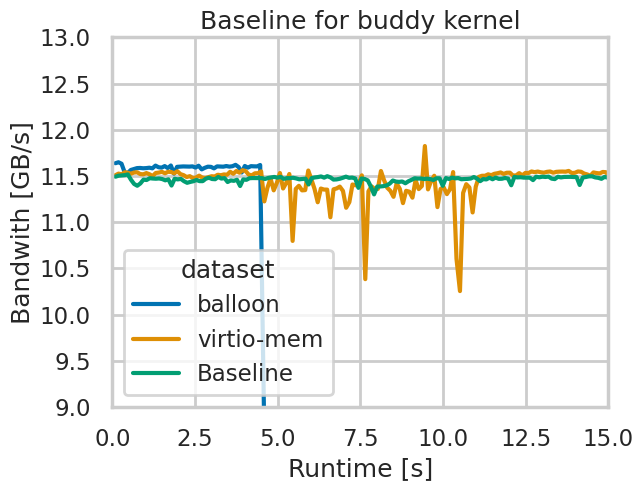

In [2]:
baseline = load_df(Path("stream/240327-155018/Triad.csv"))
balloon = load_df(Path("stream/240327-155219/Triad.csv"))
virtio_mem = load_df(Path("stream/240328-152639/Triad.csv"))
concat = pd.concat([balloon.assign(dataset="balloon"), virtio_mem.assign(dataset="virtio-mem"), baseline.assign(dataset="Baseline")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(9.0, 13.0)
plot.set_xlim(0.0, 15.0)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("Baseline for buddy kernel")

Text(0.5, 1.0, 'Baseline for llfree kernel')

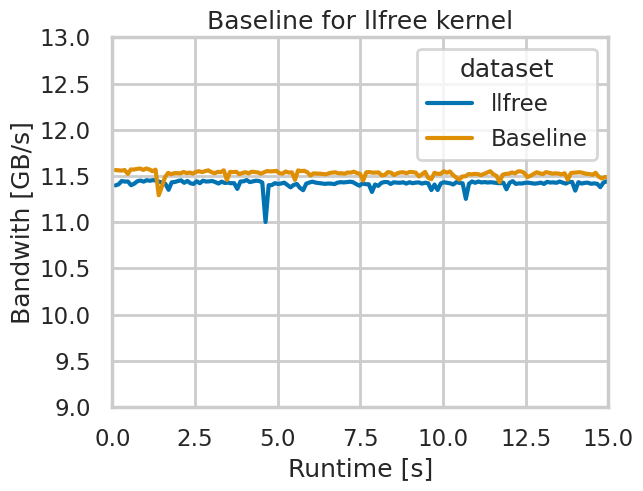

In [3]:
baseline = load_df(Path("stream/240327-154753/Triad.csv"))
llfree = load_df(Path("stream/240327-155419/Triad.csv"))
concat = pd.concat([llfree.assign(dataset="llfree"), baseline.assign(dataset="Baseline")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(9.0, 13.0)
plot.set_xlim(0.0, 15.0)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("Baseline for llfree kernel")

Text(0.5, 1.0, 'STREAM with one thread')

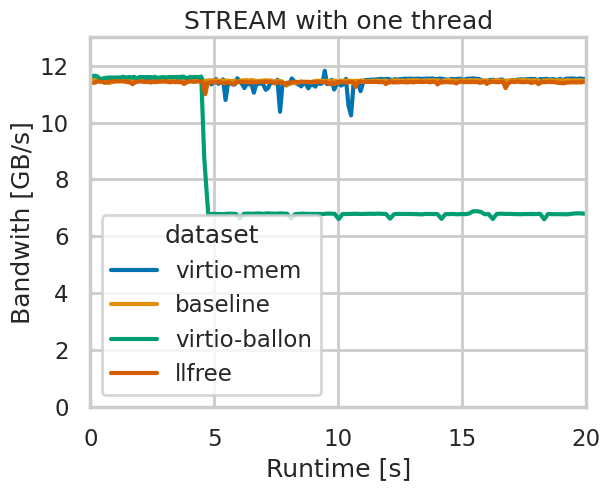

In [4]:
baseline = load_df(Path("stream/240327-155018/Triad.csv"))
virtio_balloon = load_df(Path("stream/240327-155219/Triad.csv"))
virtio_mem = load_df(Path("stream/240328-152639/Triad.csv"))
llfree = load_df(Path("stream/240327-155419/Triad.csv"))
concat = pd.concat([virtio_mem.assign(dataset="virtio-mem"), baseline.assign(dataset="baseline"), virtio_balloon.assign(dataset="virtio-ballon"), llfree.assign(dataset="llfree")])
plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(0.0, 13.0)
plot.set_xlim(0.0, 20)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM with one thread")

Text(0.5, 1.0, 'STREAM with 10 threads')

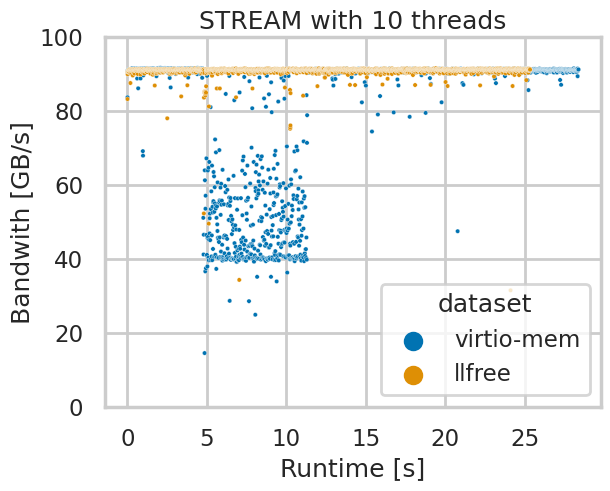

In [5]:
#llfree = load_df(Path("stream/240402-122757/Copy.csv"))
virtiomem = load_df(Path("stream/240402-142029/Copy.csv"))
#rand = load_df(Path("stream/240402-131920/Copy.csv"))
#rand = load_df(Path("stream/240402-130818/Triad.csv"))
llfree = load_df(Path("stream/240402-142627/Copy.csv"))
concat = pd.concat([virtiomem.assign(dataset="virtio-mem"), llfree.assign(dataset="llfree")])
plot = sns.scatterplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset", s=10.0)
#plot = sns.lineplot(x="IterTime", y="Bandwidth", data=concat, hue="dataset")
plot.set_ylim(0, 100)
plot.set_ylabel("Bandwith [GB/s]")
plot.set_xlabel("Runtime [s]")
plot.set_title("STREAM with 10 threads")